Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection

In [2]:
titanic_data = pd.read_csv(r"C:\Users\ashut\OneDrive\Desktop\titnic_train_Data.csv")

In [3]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [4]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Finding missing values

In [5]:
# checking the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing values

In [6]:
# droping the "Cabin" column from the dataframe because it contain too much missing(null) values
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [7]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [8]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
print(titanic_data['Embarked'].mode()[0])

S


In [10]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [11]:
# rechecking the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [12]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

In [14]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

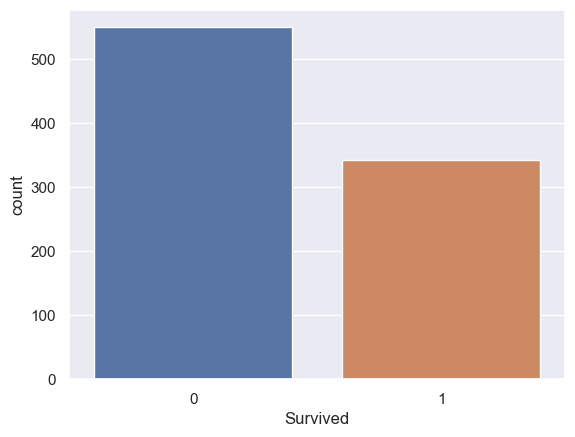

In [15]:
# making a count plot for "Survived" column 
sns.countplot(x='Survived', data=titanic_data)

In [16]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

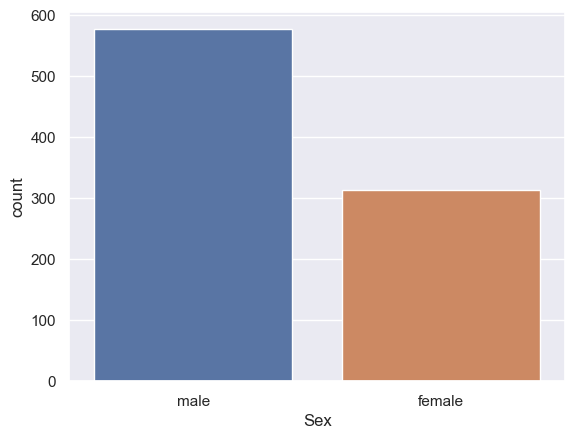

In [17]:
# making a count plot for "Sex" column

sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

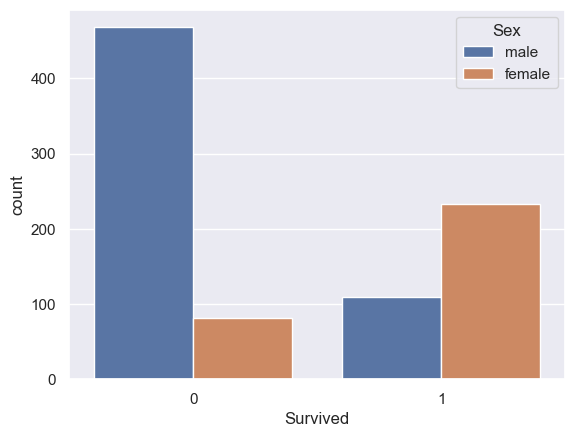

In [19]:
# number of survivors Gender wise
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

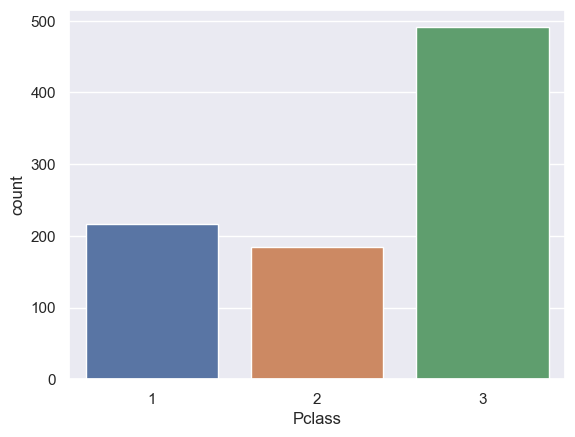

In [20]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

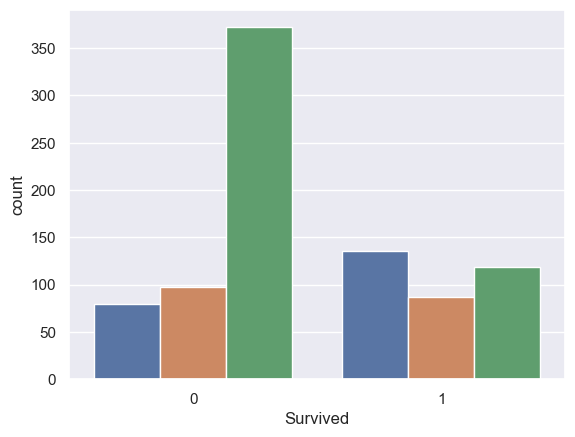

In [31]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

Encoding the Categorical Columns

In [22]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
# converting categorical Column sex in 0,1 form like male=0 and female = 1
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [26]:
# Over-sample the minority class
from sklearn.utils import resample
df_majority = titanic_data[titanic_data['Survived'] == 0]
df_minority = titanic_data[titanic_data['Survived'] == 1]


df_minority_over = resample(df_minority, 
                            replace=True,    # sample with replacement
                            n_samples=len(df_majority), # match majority class
                            random_state=42)  # reproducibility

# Combine majority class with up-sampled minority class
df = pd.concat([df_majority, df_minority_over])

# Display new class counts
print(df['Survived'].value_counts())


Survived
0    549
1    549
Name: count, dtype: int64


Separating features & Target

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
...,...,...,...,...,...,...,...,...,...,...,...
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.000000,0,0,350043,7.7958,0
387,388,1,2,"Buss, Miss. Kate",1,36.000000,0,0,27849,13.0000,0
369,370,1,1,"Aubart, Mme. Leontine Pauline",1,24.000000,0,0,PC 17477,69.3000,1
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",0,9.000000,0,2,363291,20.5250,0


<Axes: xlabel='Survived', ylabel='count'>

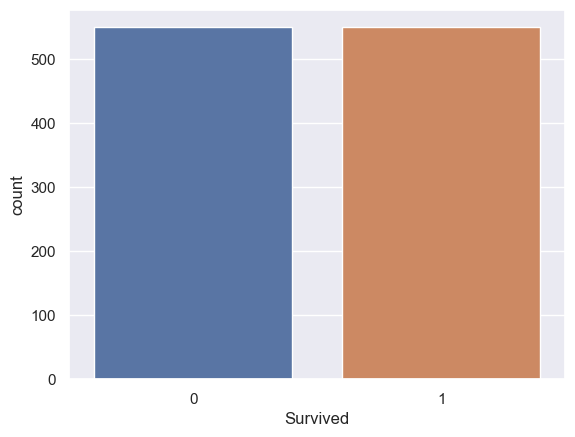

In [28]:
sns.countplot(x='Survived', data=df)

In [29]:
# making a count plot for "Sex" column
df['Sex'].value_counts()

Sex
0    651
1    447
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

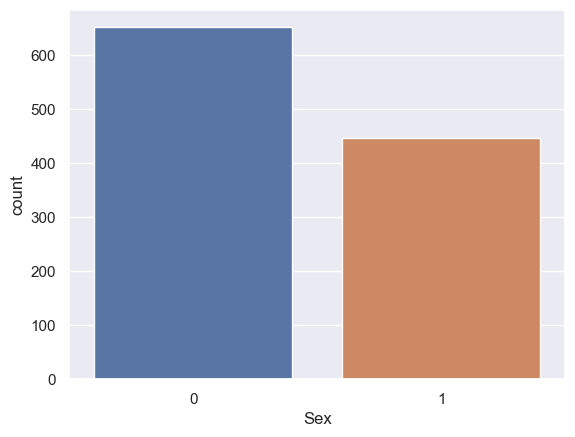

In [30]:
sns.countplot(x='Sex', data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

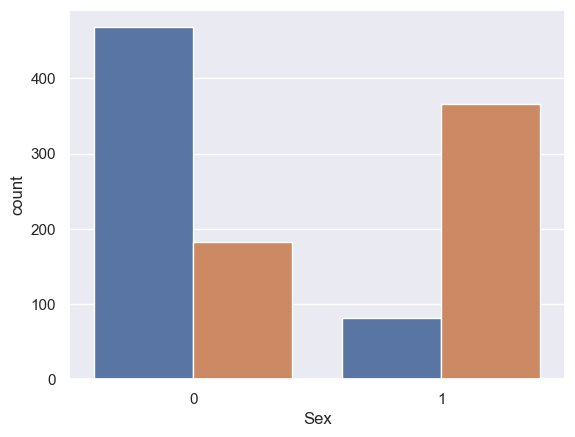

In [30]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=df)

In [31]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [32]:
print(X)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         3    0  22.000000      1      0    7.2500         0
4         3    0  35.000000      0      0    8.0500         0
5         3    0  29.699118      0      0    8.4583         2
6         1    0  54.000000      0      0   51.8625         0
7         3    0   2.000000      3      1   21.0750         0
..      ...  ...        ...    ...    ...       ...       ...
146       3    0  27.000000      0      0    7.7958         0
387       2    1  36.000000      0      0   13.0000         0
369       1    1  24.000000      0      0   69.3000         1
165       3    0   9.000000      0      2   20.5250         0
88        1    1  23.000000      3      2  263.0000         0

[1098 rows x 7 columns]


In [33]:
print(Y)

0      0
4      0
5      0
6      0
7      0
      ..
146    1
387    1
369    1
165    1
88     1
Name: Survived, Length: 1098, dtype: int64


Splitting the data into training data & Test data

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=3)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(1098, 7) (768, 7) (330, 7)


Model Training

Logistic Regression

In [60]:
model = LogisticRegression()

In [61]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [62]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [63]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100)

Accuracy score of training data :  78.64583333333334


In [64]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [65]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100)

Accuracy score of test data :  77.57575757575758
